In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC, LinearSVC, SVR, OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Iris
iris = datasets.load_iris()
X = iris.data[:, (2, 3)]  # petal length & width
y = iris.target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [2]:
lin_svc = LinearSVC(C=1, max_iter=10000)
lin_svc.fit(X_scaled, y)
print("Linear SVC accuracy:", lin_svc.score(X_scaled, y))

# Decision boundary visualization helper
def plot_decision_boundary(clf, X, y, title):
    # function code here to plot boundaries and support vectors...
    pass

plot_decision_boundary(lin_svc, X_scaled, y, "LinearSVC (C=1)")

Linear SVC accuracy: 0.9533333333333334


In [3]:
gamma = 0.1
svc = SVC(kernel="rbf", gamma=gamma, C=1)
svc.fit(X_scaled, y)
plot_decision_boundary(svc, X_scaled, y, f"SVC RBF (C=1, γ={gamma})")

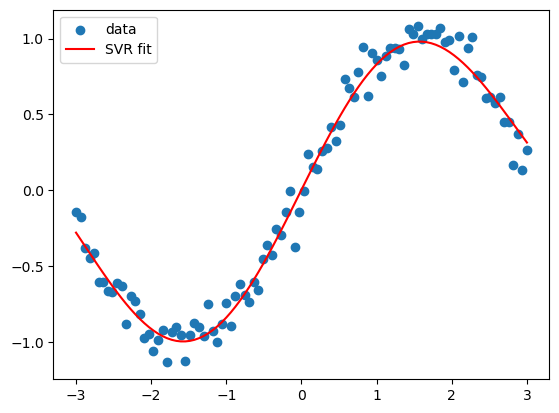

In [4]:
X_reg = np.linspace(-3, 3, 100).reshape(-1, 1)
y_reg = np.sin(X_reg).ravel()
y_reg += np.random.randn(len(y_reg)) * 0.1
svr = SVR(kernel="rbf", C=1, epsilon=0.1, gamma=0.2)
svr.fit(X_reg, y_reg)
y_pred = svr.predict(X_reg)
plt.figure(); plt.scatter(X_reg, y_reg, label="data")
plt.plot(X_reg, y_pred, color="red", label="SVR fit"); plt.legend()

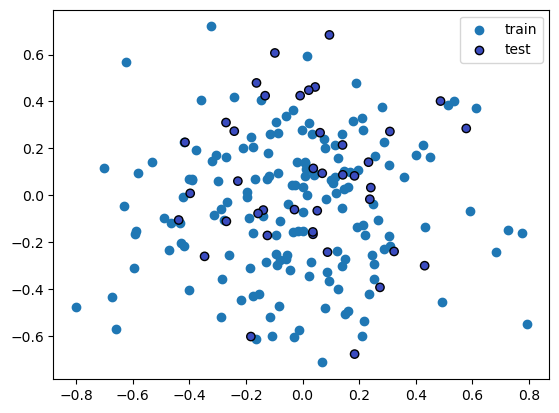

In [5]:
X_train, X_test = train_test_split(
    np.random.randn(200, 2) * 0.3, test_size=0.2, random_state=42
)
oc_svm = OneClassSVM(kernel="rbf", gamma=0.1, nu=0.05)
oc_svm.fit(X_train)
mask = oc_svm.predict(X_test) == 1
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=mask, cmap="coolwarm", edgecolor="k", label="test"
)
plt.legend()